In [2]:
% matplotlib inline

from numpy import ones
from math import *
from pylab import *
import random


STEPS = 10**6
K = 1#.38064852e-23
N = 16
J = 1

NS = []


In [60]:
def process(T):
    print(T)
    counter = 0
    beta = -1/(K*T)
    S = ones([N,N]) 
    absm = 0
    M = N**2
    Msquared = 0

    for k in range(STEPS):
        i,j = random.randint(0, N-1), random.randint(0, N-1)

        if k > 5000 and (k % N**2 ) == 0:
            absm += abs(M)
            Msquared += M**2
            counter += 1
        current = S[i,j]
        deltae = current*( J*2* (S[(i+1) % N][j]+ S[i][(j+1) % N] + S[i-1][j] +S[i][j-1]))
        if random.random() < exp( beta * deltae):
            S[i][j] *= -1
            current *= -1
            M = M + 2* current
    MExpected = absm/counter
    Msquared = Msquared/counter
    
    return MExpected, Msquared

In [61]:

import multiprocessing

pool = multiprocessing.Pool()
plt2 = pool.map(process, arange(.1, 4, .1))


0.7000000000000001
0.5
0.30000000000000004
0.8
0.9
3.0000000000000004
3.2
1.6
0.4
0.6
1.4000000000000001
3.1
2.0
1.3000000000000003
1.8000000000000003
1.7000000000000002
1.0
2.8000000000000003
1.1
0.2
2.6
1.2000000000000002
1.5000000000000002
0.1
2.9000000000000004
2.3000000000000003
2.2
2.4000000000000004
2.7
2.1
2.5000000000000004
1.9000000000000001
3.3000000000000003
3.4000000000000004
3.5000000000000004
3.6
3.7
3.8000000000000003
3.9000000000000004


In [62]:
plt = []
Ms = []
for i in plt2:
    plt.append(i[0])
    Ms.append(i[1])

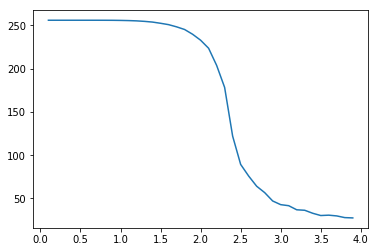

In [63]:
# Magnetization
plot(arange(.1, 4, .1), plt)
NS = plt

In [64]:
def eExp(T):
    index = np.where(arange(.1, 4, .1) == T)[0][0]
    return -2*J * NS[index]

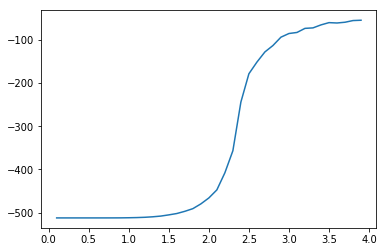

In [65]:
# Expected Energy
plot(arange(.1, 4, .1),[eExp(t) for t in arange(.1, 4, .1)])

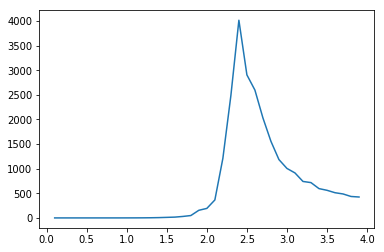

In [69]:
# Suceptibility
plot(arange(.1, 4, .1), [Ms[i] - NS[i]**2 for i in range(len(Ms))])

In [1]:
imshow(Ms)

NameError: name 'imshow' is not defined